Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "Vlad11000"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    # YOUR CODE HERE
    q = np.array([[1, 1, 1], [0, 1, 2], [0, 1, 4]])
    w = np.array([0, 1, 0])
    e = np.linalg.solve(q, w)
    n = e[0] * f(x) + e[1] * f(x + h) + e[2] * f(x + 2 * h)
    t = n / h
    return t
    raise NotImplementedError()

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [14]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Погрешность уменьшается при стремлении к нулю.

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [15]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

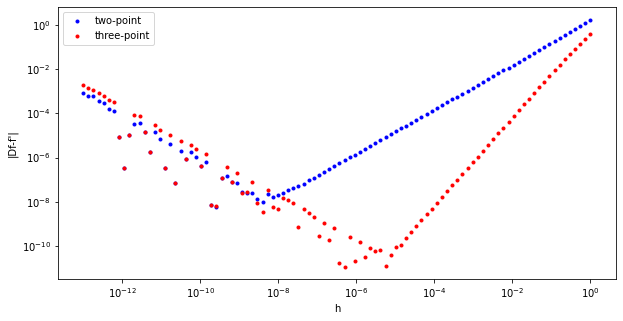

In [16]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt


def two(f, x, h):
    x0=x
    x1=x+h
    deriv = (f(x1) - f(x0)) / h
    return deriv

def three(f,x,h):
    x0=x
    x1=x+h
    x2=x+2*h
    deriv = 1/(2*h)*(-3*f(x0)+4*f(x1)-f(x2))
    return deriv

x=1
h_arr = np.logspace(-13, 0, num=100)
two_arr  = np.array([])
three_arr = np.array([])

for h in h_arr:
    two_arr = np.append(
        two_arr, np.abs(two(f, x, h)-fder(x)))
    three_arr = np.append(
        three_arr, np.abs(three(f, x, h)-fder(x)))

plt.figure(figsize=(10, 5))
plt.loglog(h_arr, two_arr, 'b.', label='two-point')
plt.loglog(h_arr, three_arr, 'r.', label='three-point')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()

значение h можно оценить из графика.

### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [17]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


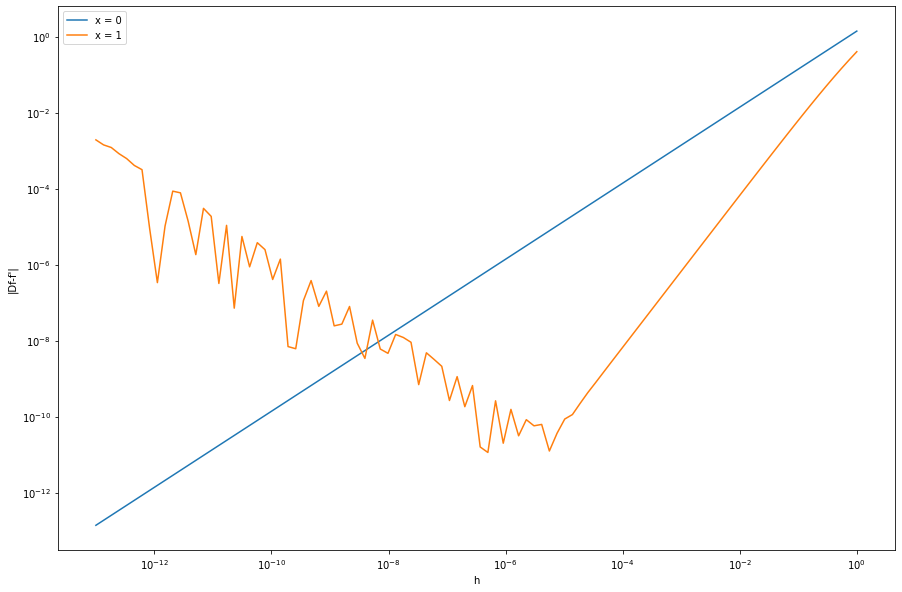

In [18]:
# YOUR CODE HERE
x = 0
x1 = 1
h_arr = np.logspace(-13, 0, num=100)
df_forward_arr = np.array([])
df_forward_arr_c = np.array([])

for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(deriv(f, x, h) - fder(x)))
    df_forward_arr_c = np.append(df_forward_arr_c, np.abs(deriv(f, x1, h) - fder(x1)))
    
plt.figure(figsize = (15, 10))
plt.loglog(h_arr, df_forward_arr, '-', label = f'x = {x}')
plt.loglog(h_arr, df_forward_arr_c, '-', label = f'x = {x1}')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()

В нуле изза того что есть ошибка при маленьких значениях ошибка не сходится с теоретической.

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [19]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    n = 1
    i_n = func((a + b) / 2) * (b - a)
    i_2n = (func((a + (a + b) / 2) / 2) + func(((a + b) / 2 + b) / 2)) * (b - a) / 2
    while abs(i_2n - i_n) >= eps:
        n += 1
        h = (b - a) / n
        i = np.arange(1, n + 1)
        i_n = (func(a + (i - 0.5) * h) * h).sum()
        h = (b - a) / (2 * n)
        i = np.arange(1, 2 * n + 1)
        i_2n = (func(a + (i - 0.5) * h) * h).sum()
    integral = i_n 
    return integral, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


682.4986674375125 599


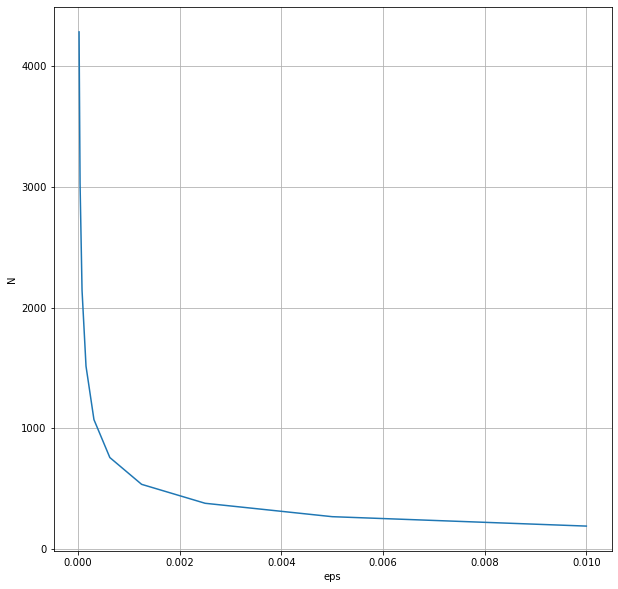

In [22]:
f = lambda x: x**5
a, b = 1, 4
int, n = midpoint_rule(f, a, b, 0.001)
eps = [0.01 / 2**(i) for i in range(10)]
N = [midpoint_rule(f, a, b, eps=0.01 / 2**(i))[1] for i in range(10)]
plt.figure(figsize=(10, 10))
plt.plot(eps, N)
plt.xlabel("eps")
plt.ylabel("N")
plt.grid(True)
print(int,n)

Скорость сходимости такая какая ожидалась, а вот численное значение результата не попадает в интервал заданной ошибки.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [25]:
f = lambda x: 2 * np.sin(x) / x
a, b = 0, 1
A1, n = midpoint_rule(f, a, b, eps=10**(-4))
print(A1, n)
f = lambda x: 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
A2, n = midpoint_rule(f, a, b, eps=10**(-4))
print(A2, n)

1.8922941998480554 14
1.8920193180026728 16


Во втором случае потребовалсь больше шагов.

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [27]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    n = 1
    h = (b - a) / n
    A_n = func((a + b) / 2) * h
    c = (a + b) / 2
    A_1n = (func((a + c) / 2) + func((c + b) / 2)) * h / (2 * n)
    while abs(I_2n - I_n) >= eps:
        n += 1
        h = (b - a) / n
        A_n = 0
        A_1n = 0
        for i in range(n):
            A_n += (func((a + (i - 0.5) * h))) * h / 2
            A_1n += (func((a + (i - 0.5) * (h / 2)))) * h / 2
    integral = A_n 
    return integral, n

In [28]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
